In [3]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
!mkdir  -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
mv /path/to/kaggle.json /root/.kaggle/kaggle.json

mv: cannot stat '/path/to/kaggle.json': No such file or directory


In [6]:
%env KAGGLE_USERNAME=yogeshrbagul
%env KAGGLE_KEY=39df83cbf75cb1ead6a35498fab6fb93

env: KAGGLE_USERNAME=yogeshrbagul
env: KAGGLE_KEY=39df83cbf75cb1ead6a35498fab6fb93


In [22]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving HyderabadResturants.csv to HyderabadResturants.csv
User uploaded file "HyderabadResturants.csv" with length 85123 bytes


In [14]:
import pandas as pd

In [27]:
#reading the dataset
data=pd.read_csv("HyderabadResturants.csv")
data.head() # prints the first N rows of a DataFrame

,links,names,ratings,cuisine,price for one
0,https://www.zomato.com/hyderabad/sahara-bakers...,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100
1,https://www.zomato.com/hyderabad/kfc-abids/order,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100
2,https://www.zomato.com/hyderabad/subbaiah-gari...,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100
3,https://www.zomato.com/hyderabad/paradise-biry...,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100
4,https://www.zomato.com/hyderabad/pista-house-b...,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rol...",100


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   links          657 non-null    object
 1   names          657 non-null    object
 2   ratings        657 non-null    object
 3   cuisine        657 non-null    object
 4   price for one  657 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 25.8+ KB


In [29]:
data.shape

(657, 5)

In [32]:
data[["cuisine1", "cuisine2",'cuisine3','cuisine4' ,'cuisine5','cuisine6','cuisine7','cuisine8']]
data.rename(columns ={'price for one': 'price'},inplace=True)
data.head()

,links,names,ratings,cuisine,price,cuisine1,cuisine2,cuisine3,cuisine4,cuisine5,cuisine6,cuisine7,cuisine8
0,https://www.zomato.com/hyderabad/sahara-bakers...,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100,Chinese,Bakery,Sichuan,Pizza,Burger,None,None,None
1,https://www.zomato.com/hyderabad/kfc-abids/order,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100,Burger,Fast Food,Biryani,Desserts,Beverages,None,None,None
2,https://www.zomato.com/hyderabad/subbaiah-gari...,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100,South Indian,Andhra,Mithai,None,None,None,None,None
3,https://www.zomato.com/hyderabad/paradise-biry...,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100,Biryani,Kebab,Desserts,Beverages,None,None,None,None
4,https://www.zomato.com/hyderabad/pista-house-b...,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rol...",100,Fast Food,Sandwich,Pizza,Burger,Wraps,Rolls,Salad,Desserts


In [33]:
features = ["cuisine1", "cuisine2",'cuisine3','cuisine4' ,'cuisine5','cuisine6','cuisine7','cuisine8']
data["temp"] = data[features].isnull().sum(axis=1)
data["no_Of_cusines"] = 8- data["temp"]
# data.drop(['temp','cuisine'],axis=1,inplace=True)
data.head()

,links,names,ratings,cuisine,price,cuisine1,cuisine2,cuisine3,cuisine4,cuisine5,cuisine6,cuisine7,cuisine8,temp,no_Of_cusines
0,https://www.zomato.com/hyderabad/sahara-bakers...,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100,Chinese,Bakery,Sichuan,Pizza,Burger,None,None,None,3,5
1,https://www.zomato.com/hyderabad/kfc-abids/order,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100,Burger,Fast Food,Biryani,Desserts,Beverages,None,None,None,3,5
2,https://www.zomato.com/hyderabad/subbaiah-gari...,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100,South Indian,Andhra,Mithai,None,None,None,None,None,5,3
3,https://www.zomato.com/hyderabad/paradise-biry...,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100,Biryani,Kebab,Desserts,Beverages,None,None,None,None,4,4
4,https://www.zomato.com/hyderabad/pista-house-b...,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rol...",100,Fast Food,Sandwich,Pizza,Burger,Wraps,Rolls,Salad,Desserts,0,8


In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have already loaded the DataFrame named 'data'

# Convert the 'cuisine' column to a list
feature = data["cuisine"].tolist()

# Create the TF-IDF vectorizer and compute the TF-IDF matrix
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)

# Compute the cosine similarity matrix
similarity = cosine_similarity(tfidf_matrix)

In [36]:
indices = pd.Series(data.index, index=data['names']).drop_duplicates()

In [37]:
def restaurant_recommendation(name, similarity = similarity):
    index = indices[name]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:10]
    restaurantindices = [i[0] for i in similarity_scores]
    return data['names'].iloc[restaurantindices]

In [38]:
print(restaurant_recommendation("Paradise Biryani"))

3                        Paradise Biryani
621             Potful - Claypot Biryanis
37                        Behrouz Biryani
303    Aarth - Authentic Claypot Biryanis
245                       Makhni Brothers
118                          Hotel Sohail
500                      Heavenly Biryani
43       Capital Multi Cuisine Restaurant
646                   Bhatthi By Phulkaas
122                     Redaan Restaurant
Name: names, dtype: object


In [39]:
data.ratings.unique()

array(['3.7', '3.9', '4.1', '4.3', '4', '4.2', '4.4', '4.5', '3.8', '4.6',
       '3.6', 'New', '3.4', '3.5', '3.1', '3.3', '2.7', '3.2', '-', '3',
       '4.7', '2.8', '2.9', '2.6'], dtype=object)

In [40]:
data.ratings.value_counts()

4      103
4.1     77
4.3     66
-       63
3.9     62
4.2     62
3.7     44
3.8     42
3.5     31
3.6     28
4.4     21
3.4     14
3.2      8
4.5      8
3.1      7
3.3      5
New      4
4.6      4
3        2
2.9      2
2.7      1
4.7      1
2.8      1
2.6      1
Name: ratings, dtype: int64

In [44]:
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

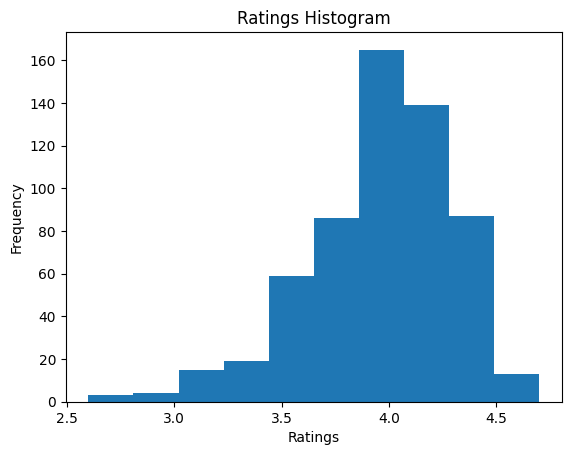

In [45]:
import matplotlib.pyplot as plt

# Convert 'ratings' column to numeric if needed (using pd.to_numeric)
# Handle missing values if needed (using dropna or fillna)

# Plot the histogram
data['ratings'].plot(kind="hist")
plt.title("Ratings Histogram")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

In [46]:
data.ratings.mean()

3.946101694915254

<Axes: >

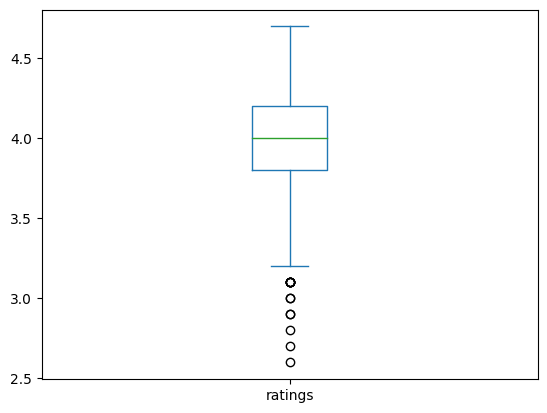

In [47]:
data['ratings'].plot(kind = "box")

<Axes: >

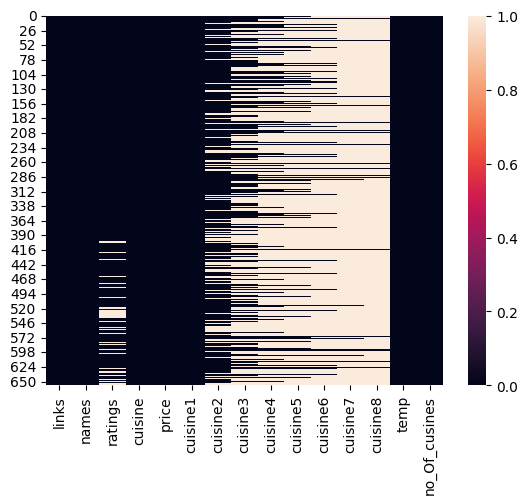

In [48]:
sns.heatmap(data.isnull())

In [49]:
data.cuisine.value_counts()

South Indian                                                                         67
Bakery, Desserts                                                                     23
Mithai, Street Food                                                                  22
Mithai                                                                               14
North Indian, Chinese                                                                13
                                                                                     ..
Chinese, North Indian, Sichuan                                                        1
Mithai, Desserts, Street Food                                                         1
Biryani, Cafe, North Indian, Continental, Street Food, Beverages, Desserts, Pizza     1
South Indian, Street Food, Juices, Beverages                                          1
Chinese, Momos                                                                        1
Name: cuisine, Length: 396, dtyp

In [50]:
data.cuisine.unique()

array(['Chinese, Bakery, Sichuan, Pizza, Burger',
       'Burger, Fast Food, Biryani, Desserts, Beverages',
       'South Indian, Andhra, Mithai',
       'Biryani, Kebab, Desserts, Beverages',
       'Fast Food, Sandwich, Pizza, Burger, Wraps, Rolls, Salad, Desserts',
       'North Indian, Chinese, Mughlai, Mandi, Sichuan, Shawarma, Seafood, Beverages',
       'South Indian, Chinese, North Indian', 'North Indian',
       'North Indian, Biryani, Mughlai', 'Ice Cream, Desserts',
       'Bakery, Desserts, Fast Food, Pizza', 'Hyderabadi, Biryani',
       'South Indian', 'Biryani', 'Pizza, Fast Food, Desserts, Beverages',
       'Andhra, Biryani, South Indian, Desserts, Beverages, Hyderabadi',
       'Burger, Fast Food', 'North Indian, Chinese, Andhra, Seafood',
       'Biryani, North Indian, Seafood, Chinese, Kebab',
       'Bakery, Fast Food, Pizza, Burger',
       'Biryani, South Indian, Mughlai, Andhra, Desserts, Hyderabadi',
       'Pizza, Pasta, Fast Food',
       'Bakery, Fast Food, 